
# Project title: No-show Appointment Data Analysis.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, we will be analysing the No-show appointment dataset from Kaggle. The dataset is a log of patients containing 13 independent variables and 1 dependent variable which indicates whether a patient will show up for an appointment or not. The dependent variable in this dataset is the No-show column which is categorical (Yes or No).

> Furthermore, this dataset will be explored and analysed following due data analysis process to further answer questions and get insight from it.

> The questions to be answered are posed below;
>1. How many patients were present for their appointment and how many were absent?
>2. How many males and female were present and absent?
>3. Do people with hypertension show up more for their appointment than those that don't?
>4. How many hypertensive patients and Alcoholic patients are in the dataset?

In [61]:
# We will start by importing the necessary libararies that will be used for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section, we will be loading our dataset into the notebook, inspect the data and clean it so it is best fit for our analysis.

> The Data Wrangling section will be further divided into two; Data Inspection and Data Cleaning.


### Data Inspection

> We will be loading and inspecting our data in this part. Check the shape, info, datatypes and describe making sure we identify any anomaly that needs to be sorted during data cleaning.

In [62]:
# Here, we will load our data set and further inspect the dataset in the subsequent cells.
df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> df.head() gives us the top five (5) rows of our dataset,including the names to see what it looks like. We will be inspecting this dataset to see if there are errors, anomalies or possible things we would like to change. 

In [63]:
# Here we will be printing the number of rows and colums of the dataset
df.shape

(110527, 14)

> We can see from the result printed that the dataset has 110527 and 14 columns

In [64]:
# Here we will be checking for null values
df.isnull().sum().any()

False

> The result shows that the dataset has no null values.


In [65]:
#Check duplicates
df.duplicated().sum().any(), df.duplicated().sum()

(False, 0)

> The result shows that we have duplicates in our dataset and the number of duplicates. This will be addressed in the data cleaning section.

In [66]:
# Here, we will be checking the datatypes of the columns in the dataset
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

> From the result of the dataset, we can see that some of the columns have incorrect data types. This will be corrected when we start our data cleaning.

In [67]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

> Looking at the column names, we can see that there are errors and adjustments that needs to be made. This also will be done in the data cleaning section.

In [68]:
# The individual inspections that we have done previously, can easily be done by checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>As we can see, it gives the information of the shape of the dataset, list the column names, tells the datatypes of the columns and also tell if there are null values. Additionally, it tells the amount memory usage of our data set, which is 11.8+ MB. 

In [69]:
# check the summary statistics of our dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> From this summary statistics, we can see that it only gives us an information of the numeric columns and the columns with the string/object data types are excluded because statistics are performed on numbers. Exploring the mean of the result of our ststistics, we can say that the average age of the dataset is 37, 9% of the patients are on scholarship, 19% are hypertensive, 7% are diabetic, 3% are alcoholic, 2% are handicapped and 32% received SMS. We can also see the max, min and percentiles of the variables.

### Data Cleaning 

> After inspecting our dataset and finding out anomalies, it is time for data cleaning and adjustment of the dataset to prepare it for analysis. Here, we will correct the inconsistencies in the data by address the datatype issues and cleaning the column labels, dropping unwanted columns and dropping duplicates.

#### Changing Datatypes
> The first step will be to change the datatypes of PatientId from float to integer as it is a unique identifier and the datatypes of ScheduledDay and AppointmentDay as they are in the wrong format as object and should be in datetime format.

In [70]:
 # We will start by converting the datatype of the PatientId from float to integer
df['PatientId'] = df['PatientId'].astype('int64')

In [71]:
df['PatientId'].dtypes

dtype('int64')

> From the result of the cells above, we can see that the datatype of PatientId has been converted from float to integer

In [72]:
# convert ScheduledDay from object to datetime64
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64')

In [73]:
df['ScheduledDay'].dtypes

dtype('<M8[ns]')

In [74]:
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

> From the result of the cells above, we can see that the datatype of ScheduledId has been converted from object to datetime64. It printed out dtype('<M8[ns]') which is the same as datetime64[ns].

In [75]:
# convert AppointmentDay from object to datatime64
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64')

In [76]:
df['AppointmentDay'].dtypes

dtype('<M8[ns]')

> From the result of the cells above, we can see that the datatype of AppointmentId has been converted from object to datetime64. It printed out dtype('<M8[ns]') which is the same as datetime64[ns].

In [77]:
# This cell prints datatypes of all the columns
df.dtypes

PatientId                  int64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

> As we can see, the datatypes of all the columns have been converted to the correct format.

#### Cleaning Column Labels
> Next, we would be adjusting the column names and making sure they are written correctly and fit for the analysis.

In [78]:
# We will be renaming some of the column names here
df = df.rename(columns = {'PatientId': 'PatientID','Hipertension' : 'Hypertension', 'Handcap' : 'Handicap', 'SMS_received' : 'SMSReveived', 'No-show' : 'NoShow'})

In [79]:
# check columns
df.columns

Index(['PatientID', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSReveived', 'NoShow'],
      dtype='object')

> We have renamed the columns to best fit our analysis.

In [80]:
# Lets check the info of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientID       110527 non-null  int64         
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hypertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handicap        110527 non-null  int64         
 12  SMSReveived     110527 non-null  int64         
 13  NoShow          110527 non-null  object        
dtypes: datetime64[ns](2), int64(9), obje

> We can see we have a better information of our dataset with column names and datatypes in check.

In [81]:
# check the head of our dataset
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReveived,NoShow
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> we can see that the cleaning that we have done has reflected on the dataset.

> Next we will be dropping irrelevant columns

#### Dropping Unwanted Columns

> In this part, we will be dropping the PatientId and the AppointmentId which we won't be needing for our analysis as the are just identifiers and won't be relevant during analysis.

In [82]:
# Drop PatientID and AppointmentID
df.drop(['PatientID', 'AppointmentID'],axis = 1, inplace = True)

In [83]:
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMSReveived', 'NoShow'],
      dtype='object')

In [84]:
df.shape

(110527, 12)

> From the output, we can see that the PatientID and AppointmentID has been eliminated from the columns leaving us with 12 columns now instead of 14 columns we had when we started.

#### Removing Duplicates

> In this part, we will be dropping the duplicates which we found while inspecting our dataset.

In [85]:
#Dropping duplicates
df = df.drop_duplicates()

In [86]:
# Check if duplicates have been dropped
df.duplicated().any()

False

In [87]:
# check the shape of the dataset
df.shape

(102457, 12)

> Our dataset is clean and free from duplicates

In [88]:
# check head of the dataset
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReveived,NoShow
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> Our dataset is now clean and ready for Exploratory Data Analysis. 
> In the next section, we will be exploring the data visually and answering our research questions

<a id='eda'></a>
## Exploratory Data Analysis


>In this section, we will be exploring our data set and answering our research questions.


In [89]:
#check head of dataset
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReveived,NoShow
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<AxesSubplot:title={'center':'NoShow Distribution'}, xlabel='NoShow', ylabel='Count'>

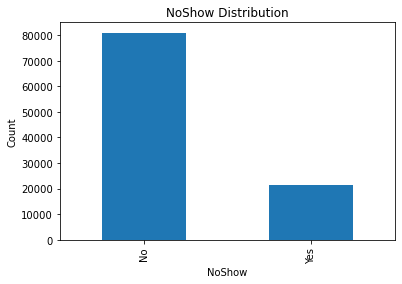

In [90]:
#Plotting a bar chart for our NoShow variable
df['NoShow'].value_counts().plot(kind = 'bar',title = 'NoShow Distribution', xlabel= 'NoShow', ylabel = 'Count')

> We can see the distribution of our NoShow variable. It has two input (yes, no) with the No dominating.

<AxesSubplot:title={'center':'Alcoholism Distribution'}, xlabel='Alcoholism', ylabel='Count'>

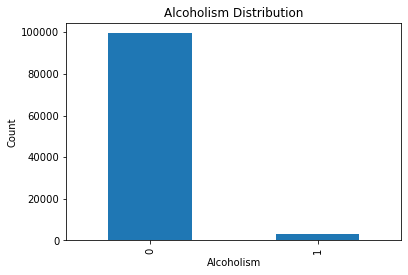

In [91]:
#Plotting a bar chart for our Alcoholism variable
df['Alcoholism'].value_counts().plot(kind = 'bar', title = 'Alcoholism Distribution', xlabel= 'Alcoholism', ylabel = 'Count')

> As we can see, the input of the dataset is categorical (1, 0) with 1 as yes and 0 as No. Again, the 0 (No) is dominating.

<AxesSubplot:title={'center':'Hypertension Distribution'}, xlabel='Hypertension', ylabel='Count'>

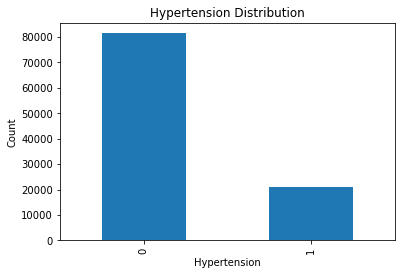

In [92]:
#Plotting a bar chart for our Hypertension variable
df['Hypertension'].value_counts().plot(kind = 'bar',title = 'Hypertension Distribution', xlabel= 'Hypertension', ylabel = 'Count')

<AxesSubplot:ylabel='Gender'>

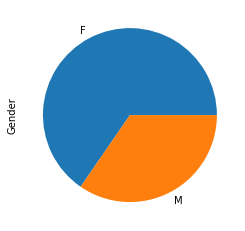

In [93]:
#Plotting a pie chart for our gender variable
df['Gender'].value_counts().plot(kind= 'pie')

### Research Question 1: How many patients were present for their appointment and how many were absent?
Here we will be calculating the number of patients that were present to their appointment and the number that were absent and further plot a distribution for it.

In [94]:
#Calculating number of patients that were present
Present = df['NoShow'] == 'Yes'
Present_value = Present.sum()
Present_value

21507

> There were 21507 patients present for their appointment

In [95]:
#Calculating number of patients that were absent
Absent = df['NoShow'] == 'No'
Absent_value=Absent.sum()
Absent_value

80950

> There were 80950 patients absent for their appointment.

In [115]:
#Defining variables for plotting in matplotlib
names = ['Present', 'Absent']
index= [Present_value,Absent_value]
color= 'red', 'blue'

In [116]:
# Creating a Function to Plot Bar Chart inorder to reduce repetitiveness and have a clean code
def plot(x_axis,y_axis,title,xlabel,ylabel):
    plt.subplots(figsize = (8, 5))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel) 
    plt.bar(x_axis,y_axis, color = color)
    
    return plot


>We have defined our bar plot function so we can be able to call it when we need to plot a bar chart.

<function __main__.plot(x_axis, y_axis, title, xlabel, ylabel)>

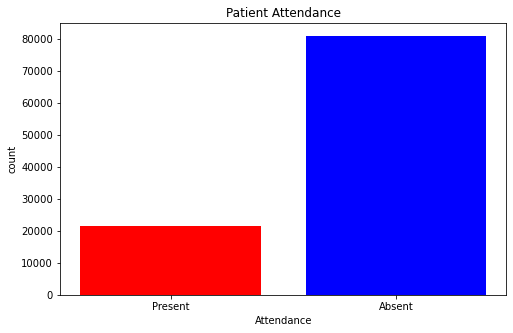

In [117]:
#calling function to plot Patient Attendance
plot(names,index,'Patient Attendance','Attendance','count')


> From the result of Question 1, we can see that more patients were absent (80950) for their appointment than present (21507).

### Research Question 2: How many males and female were present and absent?

In this question, we will be calculating the number of males and males that were present and absent for their appointment.


In [118]:
# Here we group the gender by NoShow to find the value_counts of the patients
Gender_NoShow = df.groupby(['Gender'])['NoShow'].value_counts()
Gender_NoShow

Gender  NoShow
F       No        52858
        Yes       14154
M       No        28092
        Yes        7353
Name: NoShow, dtype: int64

In [119]:
# Defining variable for a cleaner code
x_name = ['F/No', 'F/Yes', 'M/No', 'M/Yes']

<function __main__.plot(x_axis, y_axis, title, xlabel, ylabel)>

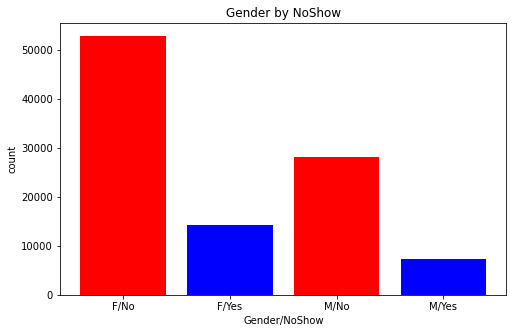

In [120]:
#calling function to plot Gender by NoShow
plot(x_name,Gender_NoShow,'Gender by NoShow','Gender/NoShow','count')

> From the result of question two (2), we can see that 52858 female didn't showup for their appointment, 14154 females showed up, 28092 male didn't show up for their appointment while 7353 did. It answers our question to how many males and females showed up and did not show up.

### Research Question 3:  Do people with hypertension show up more for their appointment than those that don't?
This part tends to find out if more people that have hypertension show up for their appointnent or more people who do not have hypertension show up.

In [121]:
#Value count of Hypertension
df['Hypertension'].value_counts()

0    81463
1    20994
Name: Hypertension, dtype: int64

In [122]:
#Group hypertension by NoShow to find the value_counts of the patients
Hypertension_NoShow = df.groupby(['Hypertension'])['NoShow'].value_counts()
Hypertension_NoShow

Hypertension  NoShow
0             No        63629
              Yes       17834
1             No        17321
              Yes        3673
Name: NoShow, dtype: int64

In [123]:
# Defining variables for plotting, for a clean and reusable code
x_nameH = ['0/No', '0/Yes', '1/No', '1/Yes']

<function __main__.plot(x_axis, y_axis, title, xlabel, ylabel)>

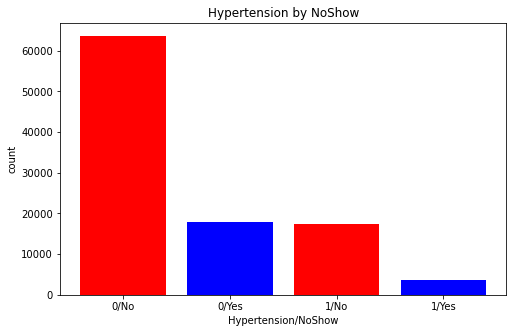

In [124]:
# calling function to plot Hypertension by NoShow
plot(x_nameH,Hypertension_NoShow,'Hypertension by NoShow','Hypertension/NoShow','count')

In [125]:
#Calculating percentage of hypertensive patients that showed up
3673/20994*100

17.495474897589787

In [126]:
#Calculating percentage of patients that are not hypertensive that showed up
17321/81463*100

21.26241361108724

>From Our result, we can see that only 12% of people with hypertension showed up for their appointment and 21% of people without hypertension showed up. This result shows that more people without hypertension go for their appointment compared to people that are hypertensive.

### Research Question 4: How many hypertensive patients and Alcoholic patients are in the dataset?
> This question gives us the number of patients that have hypertension compared to Alcoholism

In [127]:
#Calculate the sum of patients that have hypertension
df_Hyper = df['Hypertension'] == 1
df_Hyper.sum()

20994

In [128]:
#Calculate the sum of patients that are Alcoholic
df_Alcohol = df['Alcoholism'] == 1
df_Alcohol.sum()

2972

In [129]:
#Defining df_Hyper and df_Alcohol as df_HyperAl
df_HyperAl = df_Hyper.sum(), df_Alcohol.sum()
df_HyperAl

(20994, 2972)

In [130]:
# Defining variables for plots, keeps code cleaner
x_nameHA = ['Hypertensive', 'Alcoholic']

<function __main__.plot(x_axis, y_axis, title, xlabel, ylabel)>

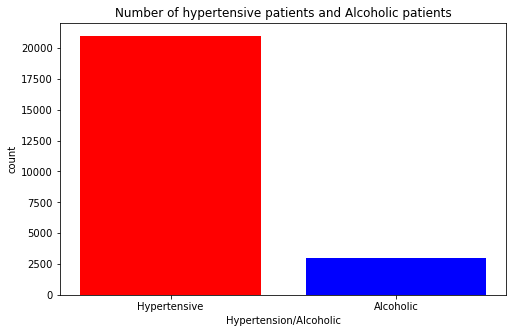

In [131]:
# calling function to plot Number of hypertensive patients and Alcoholic patients
plot(x_nameHA,df_HyperAl,'Number of hypertensive patients and Alcoholic patients','Hypertension/Alcoholic','count')

> We can see that we have more hypertensive patient (20994) than alcoholic patient (2972) in the dataset.

<a id='conclusions'></a>
## Conclusions

> In this project, we have investigated the NoShow Appointment dataset. We started by importing the dataset, then investigated it to find possible anomalies that would be addressed in the cleaning stage. In the cleaning stage, we went through several processes to make our data fit for explorations. In the exploration stage, we answered our research questions with clear notes of the processes and findings. One of the limitation of the dataset was that the time for the AppointmentDay was not indicated and so had to be removed. It was thought that the information of the exact time would have helped in the analysis.